In [1]:
!pip install geopandas==0.3.0
!pip install pyshp==1.2.10
!pip install shapely
!pip install chart-studio

In [2]:
import plotly.figure_factory as ff
import geopandas as gp
import numpy as np
import pandas as pd
import plotly.offline as py
import matplotlib.pyplot as plt
from chart_studio.plotly import plot, iplot

In [3]:
# https://chart-studio.plotly.com/~jackp/18292/plotting-d3js-county-choropleth-maps-in/#/
# df = gp.read_file("/Users/jackparmer/Downloads/cb_2016_us_county_500k/cb_2016_us_county_500k.shp")

df = gp.read_file('Resources/cb_2018_us_zcta510_500k.shp')

In [4]:
# Created Pandas DataFrame to rename (ZCTA5CE10 as Zipcode)

df_pd = pd.DataFrame(df)
df_pd = df_pd.rename(columns={"ZCTA5CE10":"Zipcode"})

In [5]:
# Converted df Zipcode column to int

df_pd["Zipcode"] = df_pd["Zipcode"].astype(int)

In [6]:
# Saving a CSV file named "california_census_data"

california_data = pd.read_csv("Resources/california_census_data.csv")

In [7]:
# Converted df Zipcode column to int

california_data["Zipcode"] = california_data["Zipcode"].astype(int)

In [8]:
# Merged df_pd and california_pd by "Zipcode"

california_merged = pd.merge(df_pd, california_data, how="inner", on="Zipcode")

In [9]:
# California City lives 100% in poverty

# max(california_merged['Poverty Rate'])
# california_merged[california_merged['Poverty Rate']==100]

In [10]:
california_geodata = gp.GeoDataFrame(california_merged, geometry='geometry')

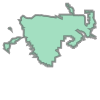

In [11]:
california_geodata['geometry'][4] 

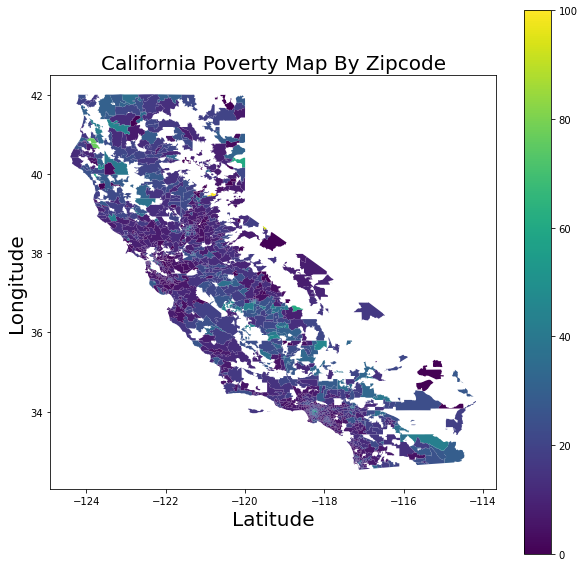

In [12]:
# df_poverty_plot = california_geodata[["Poverty Rate","geometry"]]
# %matplotlib notebook
import matplotlib.pyplot as plt

california_geodata.plot(figsize=(10,10), column='Poverty Rate', legend=True);
plt.title("California Poverty Map By Zipcode", fontsize=20);
plt.xlabel("Latitude", fontsize=20);
plt.ylabel("Longitude", fontsize=20)

plt.savefig("Choropleth Map By Zipcode")

In [13]:
california_merged.columns

Index(['Zipcode', 'AFFGEOID10', 'GEOID10', 'ALAND10', 'AWATER10', 'geometry',
       'Population', 'Poverty Count', 'poverty_male', 'poverty_female',
       'poverty_white_alone', 'poverty_black_alone',
       'population_american_indian_alone', 'poverty_asian_alone',
       'poverty_native_hawaiian_alone', 'poverty_two_or_more_races',
       'poverty_hispanic_origin', 'poverty_family',
       'poverty_family_single_male', 'poverty_family_single_female',
       'employment_labor_force', 'employment_not_labor_force',
       'employment_employed', 'employment_unemployed', 'Poverty Rate', 'index',
       'City', 'County', 'Type'],
      dtype='object')

In [14]:
def map_choropleth(df, variable, color_code, plot_title) :
    df.plot(figsize=(15,10), column = variable, legend=True, cmap= color_code);
    plt.title(plot_title, fontsize=20);
    plt.xlabel("Latitude", fontsize=20);
    plt.ylabel("Longitude", fontsize=20)

In [15]:
# Map Choropleth Colors
# 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#             'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#             'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'
# 'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
#             'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
#             'hot', 'afmhot', 'gist_heat', 'copper', 'seismic', 'nipy_spectral', 'gist_rainbow']
#

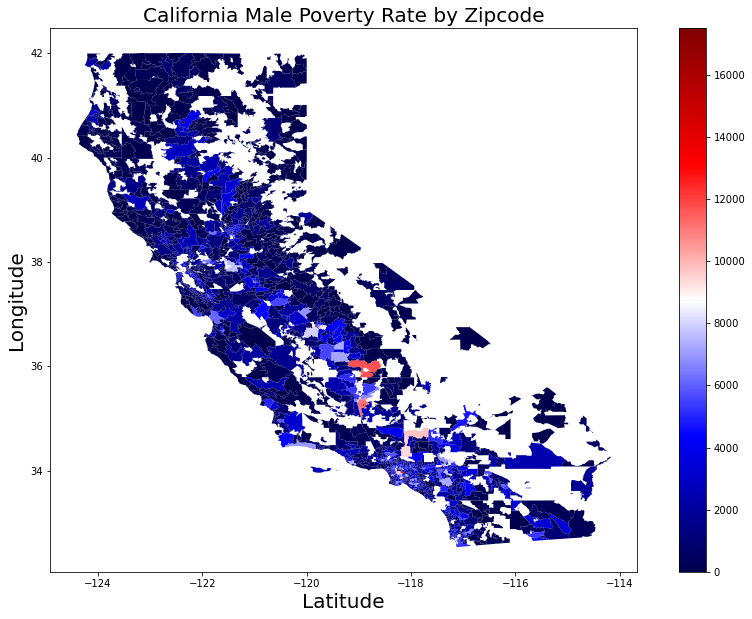

In [16]:
map_choropleth(california_geodata, 'poverty_male', 'seismic', 'California Male Poverty Rate by Zipcode')

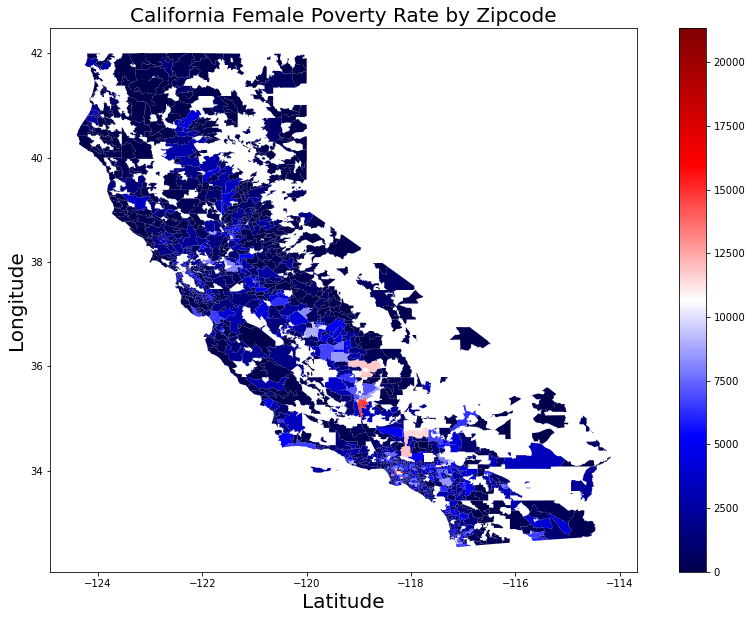

In [17]:
map_choropleth(california_geodata, 'poverty_female', 'seismic', 'California Female Poverty Rate by Zipcode')

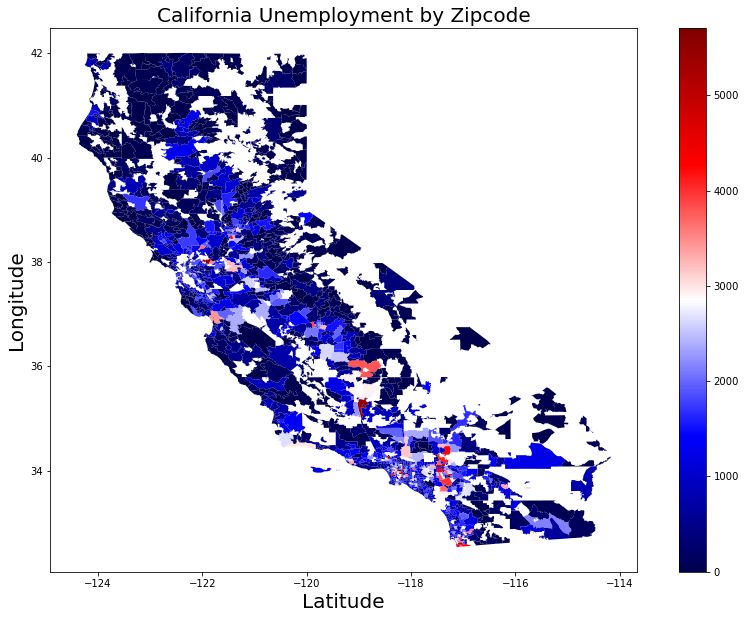

In [18]:
map_choropleth(california_geodata, 'employment_unemployed', 'seismic', 'California Unemployment by Zipcode')

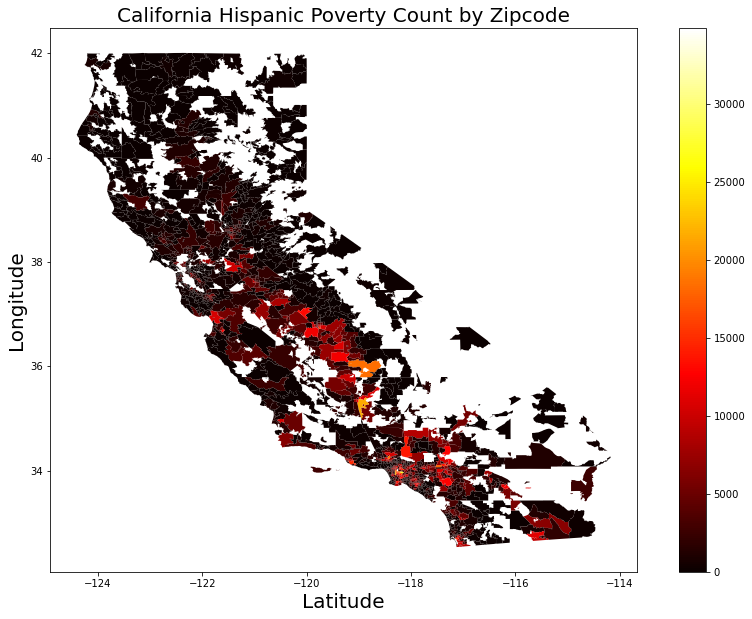

In [19]:
map_choropleth(california_geodata, 'poverty_hispanic_origin', 'hot', 'California Hispanic Poverty Count by Zipcode')

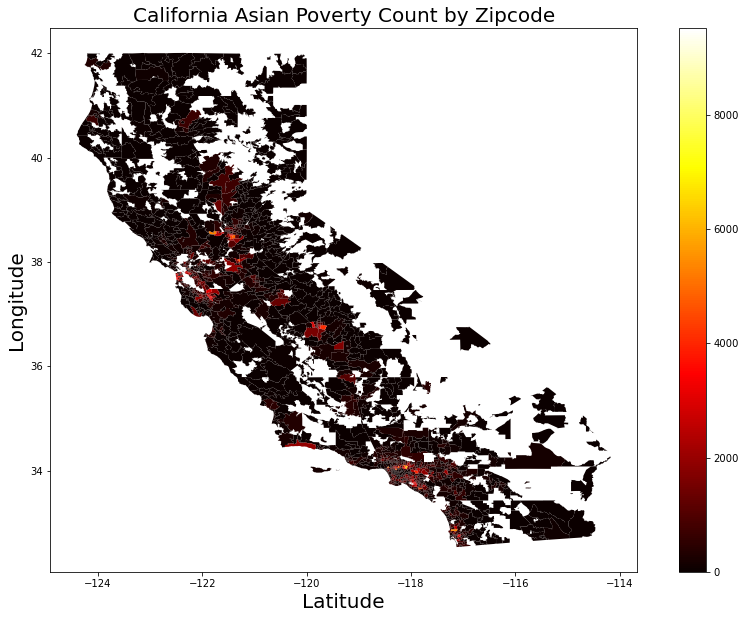

In [20]:
map_choropleth(california_geodata, 'poverty_asian_alone', 'hot', 'California Asian Poverty Count by Zipcode')

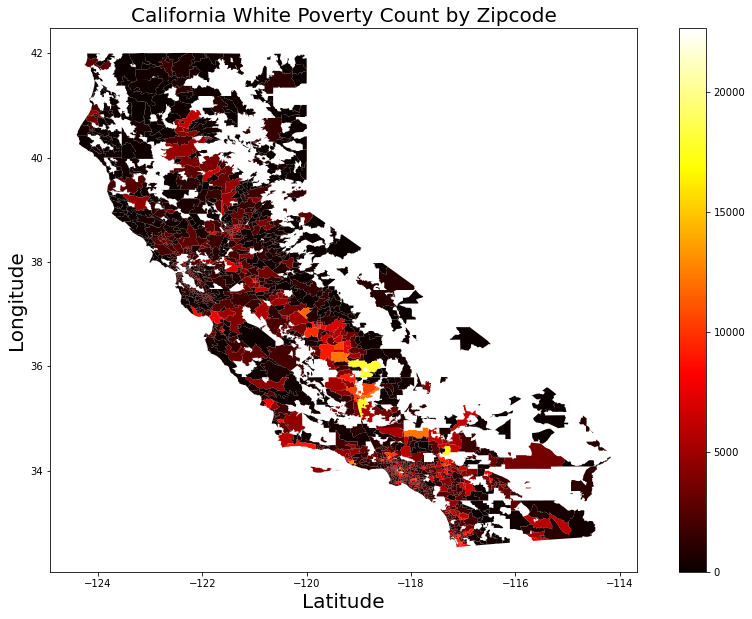

In [21]:
map_choropleth(california_geodata, 'poverty_white_alone', 'hot', 'California White Poverty Count by Zipcode')

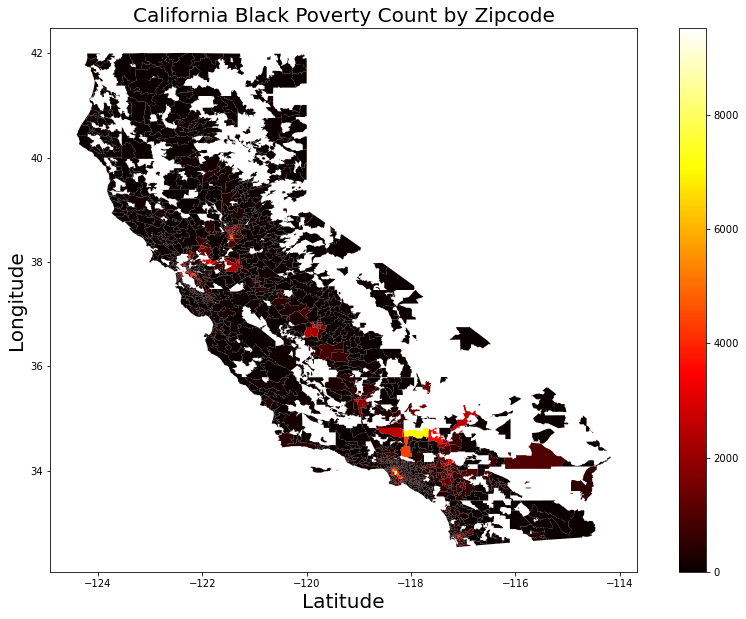

In [22]:
map_choropleth(california_geodata, 'poverty_black_alone', 'hot', 'California Black Poverty Count by Zipcode')

Los Angeles County Analysis

* Plot poverty rate in LA County
* Plot racial poverty demographics in LA County
* Overlay with Payday Lendor Locations
* Minority Poverty Rate Map (Statewide / LA County)

In [23]:
set(california_geodata["County"])

{'Alameda',
 'Alpine',
 'Amador',
 'Butte',
 'Calaveras',
 'Colusa',
 'Contra Costa',
 'Del Norte',
 'El Dorado',
 'Fresno',
 'Glenn',
 'Humboldt',
 'Imperial',
 'Inyo',
 'Kern',
 'Kings',
 'Lake',
 'Lassen',
 'Los Angeles',
 'Madera',
 'Marin',
 'Mariposa',
 'Mendocino',
 'Merced',
 'Modoc',
 'Mono',
 'Monterey',
 'Napa',
 'Nevada',
 'Orange',
 'Placer',
 'Plumas',
 'Riverside',
 'Sacramento',
 'San Benito',
 'San Bernardino',
 'San Diego',
 'San Francisco',
 'San Joaquin',
 'San Luis Obispo',
 'San Mateo',
 'Santa Barbara',
 'Santa Clara',
 'Santa Cruz',
 'Shasta',
 'Sierra',
 'Siskiyou',
 'Solano',
 'Sonoma',
 'Stanislaus',
 'Sutter',
 'Tehama',
 'Trinity',
 'Tulare',
 'Tuolumne',
 'Ventura',
 'Yolo',
 'Yuba'}

In [25]:
payday_national = pd.read_csv('Resources/Combined_Clean_PaydayLenderLocations.csv')
payday_national

,Zip Code,Payday Vendor,Address,Lat,Lng
0,90001,ACE Cash Express,"1232 E Florence Ave, Los Angeles, CA 90001, Un...",33.974583,-118.252963
1,90001,Easy Financial,"6003 Compton Ave, Los Angeles, CA 90001, Unite...",33.985552,-118.248060
2,90002,ACE Cash Express,"10005 S Central Ave, Los Angeles, CA 90002, Un...",33.945482,-118.254526
3,90002,Continental Currency Services,"1669 E 103rd St, Los Angeles, CA 90002, United...",33.943856,-118.244298
4,90002,The Check Cashing Place,"2284 E Firestone Blvd, Los Angeles, CA 90002, ...",33.957857,-118.231333
...,...,...,...,...,...
2521,96150,Western Highland Mortgage,"3170 US-50, South Lake Tahoe, CA 96150, United...",38.852693,-120.020465
2522,96150,MoneyGram,"3471 Lake Tahoe Blvd, South Lake Tahoe, CA 961...",38.946675,-119.964723
2523,96161,Sierra Mountain Mortgage Inc,"10098 Jibboom St # 201, Truckee, CA 96161, Uni...",39.328434,-120.186173
2524,96161,"Happy Investments, Inc. Truckee Ca","11260 Donner Pass Road C1 # 1014-G, Truckee, C...",39.327165,-120.205797


In [60]:
Los_Angeles = california_geodata[california_geodata['County']=="Los Angeles"]

Left off here 10/22/20

In [59]:
# payday_national.loc[0][0]
# LA_zips = list(Los_Angeles["Zipcode"])
# z_code=[]
# lat=[]
# lng=[]
# count = 0
# for zipcode in LA_zips:
#     if payday_national.loc[0][count] == zipcode:
#         z_code.append(payday_national.loc[0][count])
#         lat.append(payday_national.loc[3][count])
#         lng.append(payday_national.loc[4][count])
#         count = count + 1
#     else: 
#         count = count + 1      
            
                    

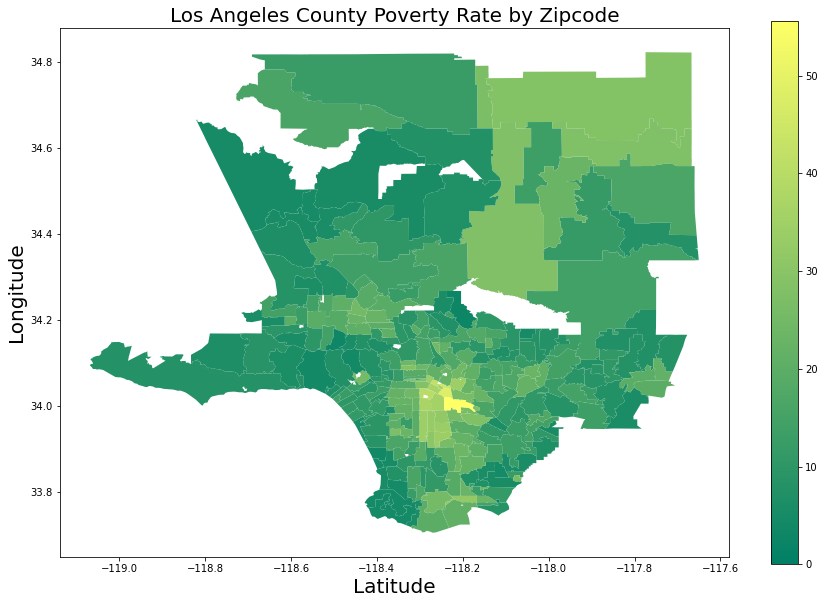

In [62]:
map_choropleth(Los_Angeles, 'Poverty Rate', 'summer', 'Los Angeles County Poverty Rate by Zipcode')

In [58]:
# LA Multi-Layer Choropleth with Payday Locations

# fig, ax = plt.subplots()
# Los_Angeles.plot(column='Poverty Rate', legend=True);
# plt.title("Los Angeles Poverty Map By Zipcode", fontsize=20);
# plt.xlabel("Latitude", fontsize=20);
# plt.ylabel("Longitude", fontsize=20);


In [63]:
Orange_County = california_geodata[california_geodata['County']=="Orange"]

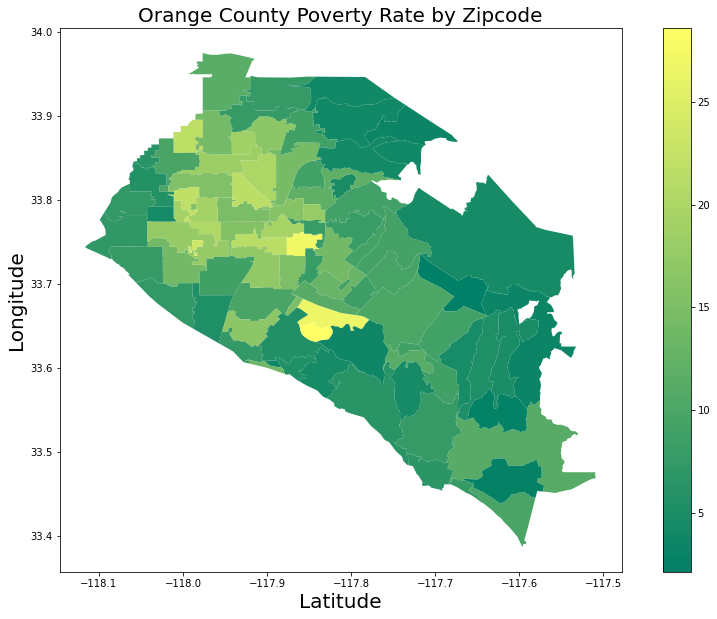

In [64]:
map_choropleth(Orange_County, 'Poverty Rate', 'summer', 'Orange County Poverty Rate by Zipcode')

In [65]:
San_Diego = california_geodata[california_geodata['County']=="San Diego"]

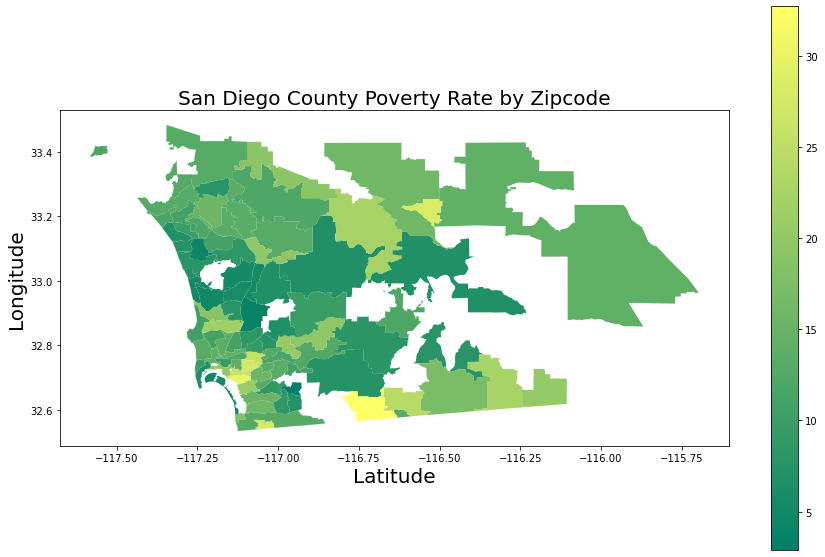

In [66]:
map_choropleth(San_Diego, 'Poverty Rate', 'summer', 'San Diego County Poverty Rate by Zipcode')

In [67]:
Imperial = california_geodata[california_geodata['County']=="Imperial"]

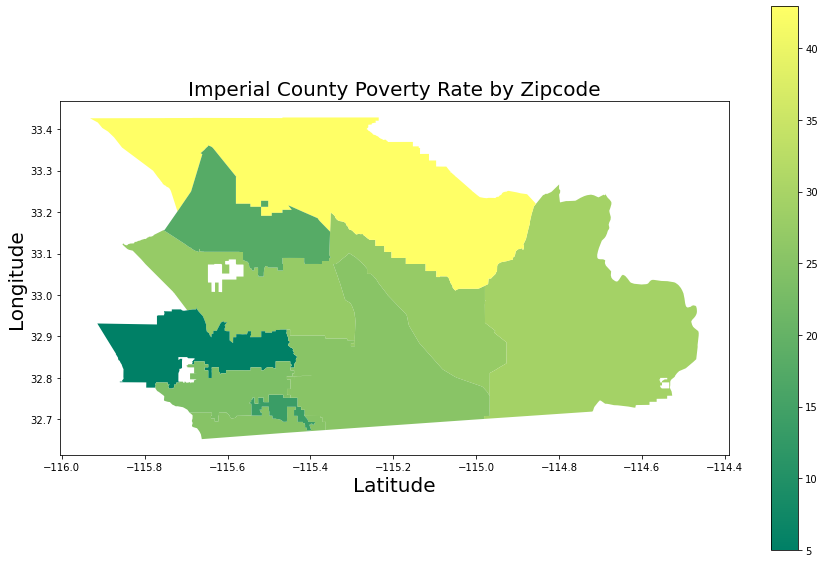

In [68]:
map_choropleth(Imperial, 'Poverty Rate', 'summer', 'Imperial County Poverty Rate by Zipcode')

In [69]:
Marin = california_geodata[california_geodata['County']=="Marin"]

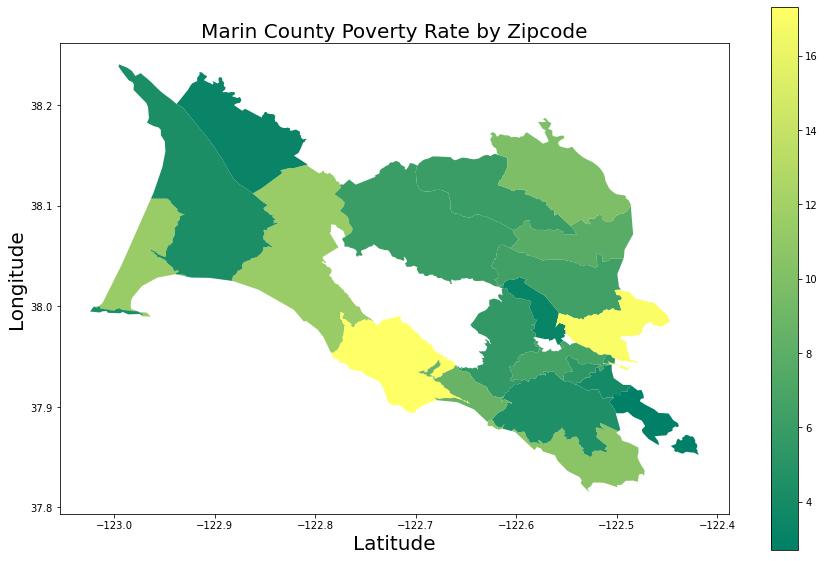

In [70]:
map_choropleth(Marin, 'Poverty Rate', 'summer', 'Marin County Poverty Rate by Zipcode')